In [37]:
%matplotlib inline
import numpy as np
import pylab as plt

import seaborn as snb
snb.set(font_scale=1.5)

# Assignment 3

### Random signal analysis: Detecting alpha-waves in the present of noise

In neuroimaging and EEG analysis, it is often interest to detect the presence of so-called alpha-waves. Alpha-waves are usually defined to oscillations in the range 8-12Hz. We will refer to this interval as the alpha frequency band.

A paragraph about alpha waves and why they are important. Maybe a figure or two

However, EEG signals are often noisy. In this assignment, you are going to construct a simple alpha-wave detector and investigate the its performance when the signal are contaminated with white noise.

A very common signal model

$$y(n) = f(n) + e(n)$$

where $y(n)$ are the assumed observed measurements, $f(n)$ is the signal of interest, and $e(n)$ is additive Gaussian noise. This is one of the most commonly used noise models and is therefore worth a closer look.

### Gaussian White noise

Let $e(n)$ for $n = 0, 1, ..., N-1$ be a random signal defined as

1) $e(n) \sim \mathcal{N}(0, \sigma_{\text{noise}}^2) $  

2) $e(n)$ and $e(m)$ are independent for $n \neq m$

This means that at all time points $n$, the observation $e(n)$ is assumed to follow a Normal distribution with zero mean and variance $\sigma^2_{\text{noise}}$. In other words, if we were to observe $M = 10000$ "parallel" versions of this signals and computed the histogram of the values at some time point $n = 100$, then the resulting distribution would be a normal distribution.

A signal with these properties is called Gaussian white noise.

Consider the vector $\mathbf{e} = \left[e(0), e(1), ..., e(N-1)\right]$, then the $n$'th element in this vector is a normal distribution with zero mean and variance $\sigma^2_{\text{noise}}$. 

***Question 1*** Argue that $\mathbf{e}$ follows a $N$-dimensional multivariate normal distribution and compute its mean vector $\mathbf{m}$ and its covariance matrix $\mathbf{V}$.

Recall that if $\textbf{x} \sim \mathcal{N}(\mathbf{m}, \mathbf{S})$ and $\mathbf{c} = \mathbf{A}\mathbf{x} + \mathbf{b}$, then $\mathbf{c}$ follows a multivariate normal distribution with mean $\mathbf{A}\mathbf{m} + \mathbf{b}$ and covariance matrix $\mathbf{A}\mathbf{S}\mathbf{A}^T$. In other words, 

$$\mathbf{c} \sim \mathcal{N}(\mathbf{A}\mathbf{m} + \mathbf{b}, \mathbf{A}\mathbf{S}\mathbf{A}^T)$$

***Question 2*** Compute the mean and covariance matrix for the random variable $\mathbf{z}$ when

$$
\begin{align*}
\mathbf{z} = \begin{bmatrix}1 & 0.5 \\ 0.5 & 1\end{bmatrix}\mathbf{x} + \begin{bmatrix}1 \\ 1\end{bmatrix}, \quad\quad\quad \text{and} \quad\quad\quad \mathbf{x} \sim \mathcal{N}\left(\begin{bmatrix}0 \\ 0\end{bmatrix} \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}\right)
\end{align*}
$$


Let's now investigate the frequency content of the additive Gaussian white noise signal. Let $\mathbf{V}$ be a $N \times N$ orthonormal basis matrix containing discrete harmonic basis functions. 

Let $\mathbf{e}$ be a white noise vector with the distribution you computed in Question 1. The coordinates of $\mathbf{e}$ expressed in the new basis is given by

$$\mathbf{z} = \mathbf{V}^T \mathbf{e}$$

***Question 3*** . Argue that $\mathbf{z}$ follows a multivariate normal distribution and show that its distribution is given by $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \sigma^2_{\text{noise}} \mathbf{I})$.

Hint: Recall that for any orthonormal matrix it holds that $\mathbf{V}^T\mathbf{V} = \mathbf{I}$. 



The statement above shows that each element $z_k$ follows a normal distribution with zero-mean and variance $\sigma^2_n$. This implies that the energy of the white noise signal is distributed evenly across all frequency component, which explains the name "white noise".

### Simulating white noise processes

In the following, we will investigate the properties of white noise empirically. To do this we will simulate $M = 10000$ realizations of a white noise process of length $N = 501$ and variance $\sigma^2_{\text{noise}} = 5$. Since the processes are inherently random, we need to simulate a large number of process and look at averages.

***Question 4*** Complete the implementation of the white noise function below:

Hint: The distribution of the white noise signal is just $\mathcal{N}(0, \sigma^2_{\text{noise}})$ at any time

In [38]:
def white_noise(N, M, sigma2_noise):
    # returns a N x D matrix, where each column is a realization from a white noise process with variance sigma2_noise
    
    # Your implementation goes here
    return np.random.normal(0, np.sqrt(sigma2_noise), size=(N, M))

The following lines will make a sanity check of your implementation. If the next cell produces an error, you need to go back and check your implementation of the function white_noise.

In [39]:
assert white_noise(500, 1000, 5).shape == (500, 1000), "The shape of the signals is wrong"
assert np.abs(np.mean(white_noise(500, 1000, 5))) < 0.1, "The mean of the signal is wrong"
assert np.abs(np.var(white_noise(500, 1000, 5)) - 5) < .1, "The variance of signals is wrong"


The following code simulates $M = 10000$ realizations from the process and plots the first three realizations.

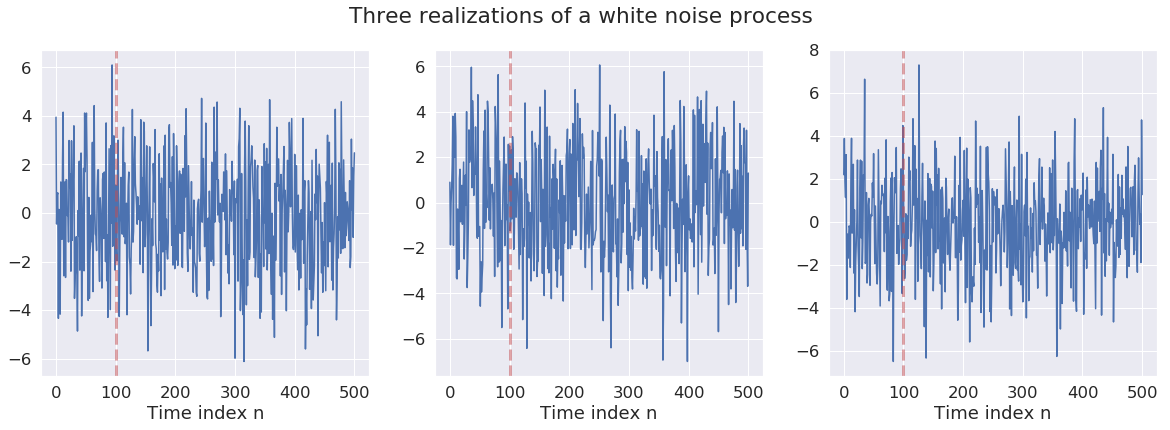

In [40]:
# seed
np.random.seed(0)

# number of realizations
M = 10000

# number of time points
N = 501

# noise variance
sigma2_noise = 5

# sampling frequency
fs = 51

# simulate data
E = white_noise(N, M, sigma2_noise)

ns = np.arange(N)
time_idx = 100

plt.figure(figsize=(20, 6))
for k in range(3):
    plt.subplot(1, 3, 1 + k)
    plt.plot(E[:, k]);
    plt.axvline(ns[time_idx], linestyle='--', color='r', alpha=0.5, linewidth=3)
    plt.xlabel('Time index n')

plt.suptitle('Three realizations of a white noise process');

and let's check that the distribution of the the signal is in fact Gaussian at time $n = 100$ (indicated by the dashed red line above)

***Question 5*** Estimate the mean and variance of the distribution shown below. Plot the density of a normal distribution with that mean and variance on top of the histogram in the figure.

Text(0.5, 0, 'Values for e(100)')

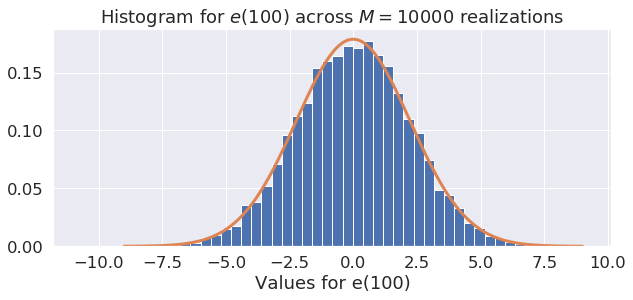

In [41]:
plt.figure(figsize=(10, 4))
plt.hist(E[time_idx, :], 50, density=True);
plt.title('Histogram for $e(%d)$ across $M = %d$ realizations' % (time_idx, M));


# solution
npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)
xs = np.linspace(-9, 9, 1000)
plt.plot(xs, npdf(xs, np.mean(E[time_idx, :]), np.var(E[time_idx, :])), linewidth=3)
plt.grid(True)
plt.xlabel('Values for e(%d)' % time_idx)
    

Recall that for a signal $e(n)$ for $n = 0, 1, ..., N-1$, the energy of $e(n)$ can be computed as 

$$E_e = \sum_{n=0}^{n-1} e(n)^2$$

***Question 6*** Complete the function compute_energy below

In [42]:
def compute_energy(y):
    # returns and computes the energy of a signal y, where y is a vector of length N
    return np.sum(y**2)



Again, let do a sanity check of your implementation. If you can an error, you need to go back and check your implementation.

In [43]:
assert(np.abs(compute_energy(white_noise(10000, 1, 1)) - 10000) < 300)
assert(np.abs(compute_energy(2*white_noise(10000, 1, 1)) - 40000) < 1000)

### Part 3: Estimating the frequency content

Let's now compute the frequency representation for all $M$ realizations using $\mathbf{z} = \mathbf{V}^T \mathbf{y}$. Next, we will compute the plot the variance of each element in $z$ across the $M$ realizations

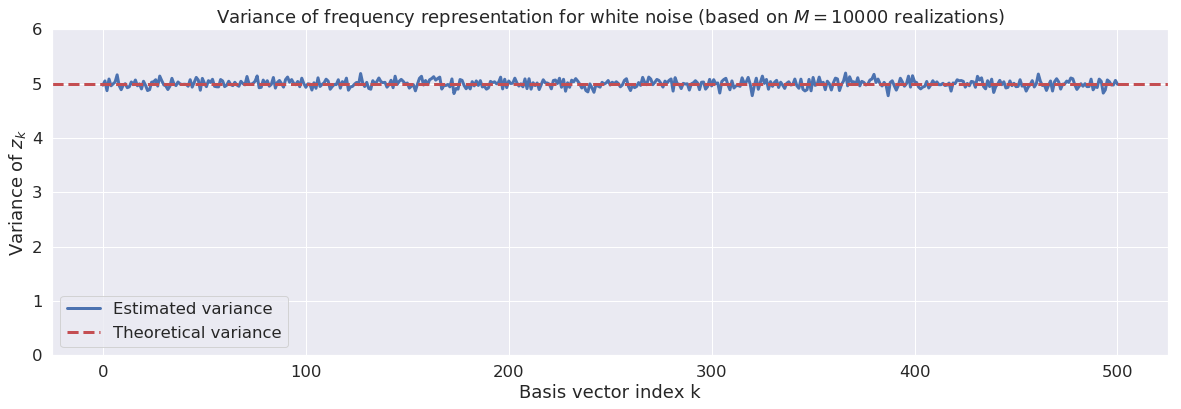

In [44]:
def create_basis(N, fs):

    # make sure we have an odd number N
    assert N % 2 == 1

    ns = np.arange(N)
    V = np.zeros((N,N))
    
    n_pairs = int((N-1)/2)

    freqs = np.arange(int(0.5*N)+1)*fs/N
    
    # first basis vector
    V[:,0] = np.ones(N)
    
    # remaining basis vectors
    for k in range(1,n_pairs + 1):
        # in each column we are going to define cosine or sine function with frequency k
        V[:,2*k-1] = np.sqrt(2)*np.cos(2*np.pi*ns/N*k) ## at each step we are filling this is a column
        V[:,2*k] = np.sqrt(2)*np.sin(2*np.pi*ns/N*k)
        

    V = V/np.sqrt(N)    
    
    return freqs, V


def compute_spectrum(y, V, scale=True):
    z = V.T@y

    z_cos = z[2::2] 
    z_sin = z[1::2]
    amp_spectrum = np.sqrt(z_cos**2 + z_sin**2)
    amp_spectrum = np.hstack((np.abs(z[0]), amp_spectrum))
    
    if scale:
        scales = np.ones(len(amp_spectrum))
        scales[0] = 1
        scales[1:] = np.sqrt(2)


        return amp_spectrum/np.sqrt(len(y))*scales
    else:
        return amp_spectrum



# prepare basis matrix V
freqs, V = create_basis(N, fs)

# compute coordinates in new basis
Z = V.T@E

# compute variances of Z
varZ = np.var(Z, 1)



plt.figure(figsize=(20, 6))
plt.plot(varZ, label='Estimated variance', linewidth=3)
plt.axhline(sigma2_noise, color='r', linewidth=3, label='Theoretical variance', linestyle='--')
plt.xlabel('Basis vector index k')
plt.ylabel('Variance of $z_k$')
plt.title('Variance of frequency representation for white noise (based on $M = %d$ realizations)' % M)
plt.legend()
plt.ylim(0, 6)
plt.grid(True)


We have now empirically validated our theoretical finding from Question 3. That is, we have shown that the energy/variance of white noise is distributed evenly across all frequency components. For this reason, we often say that white noise has a flat spectrum.

### Filtering white noise

Since white noise "contains" all frequencies up to the Nyquist frequency, we can use white noise to understand the behavoiur of a filter. The idea is to compare the frequency representation of white noise before and after applying the filter. Since we know that the spectrum will be flat before filtering, by looking at the (averaged) spectrum after filtering, we can see which frequencies are amplified by the filter and which frequencies are attennuated by the filter.

Below you are given a filter denoted as $h$. The length of the filter is 32.


In [68]:
h = np.array([-0.0022, -0.0010, 0.0007, -0.0005, -0.0001, 0.0096, 0.0129, -0.0165, -0.0490, -0.0107, 0.0802, 0.0834, -0.0519, -0.1500, -0.0445, 0.1381, 0.1381, -0.0445, -0.1500, -0.0519, 0.0834, 0.0802, -0.0107, -0.0490, -0.0165, 0.0129, 0.0096, -0.0001, -0.0005, 0.0007, -0.0010, -0.0022, ])

Let's investigate this filter by

1. Computing the convolution between all of the $M$ realization of white noise and the filter h.  


2. Computing and plotting the averaged frequency representation of the filtered signals

The code below computes the frequency representation of the filtered white noise signals and plots the variance of each element in $\mathbf{z}$ across $k$, but you need to fill in the missing pieces.

***Question 7*** Filter each of the $M = 10000$ realization of white noise with the filter $h$ using the function apply_filter and fill in the missing pieces

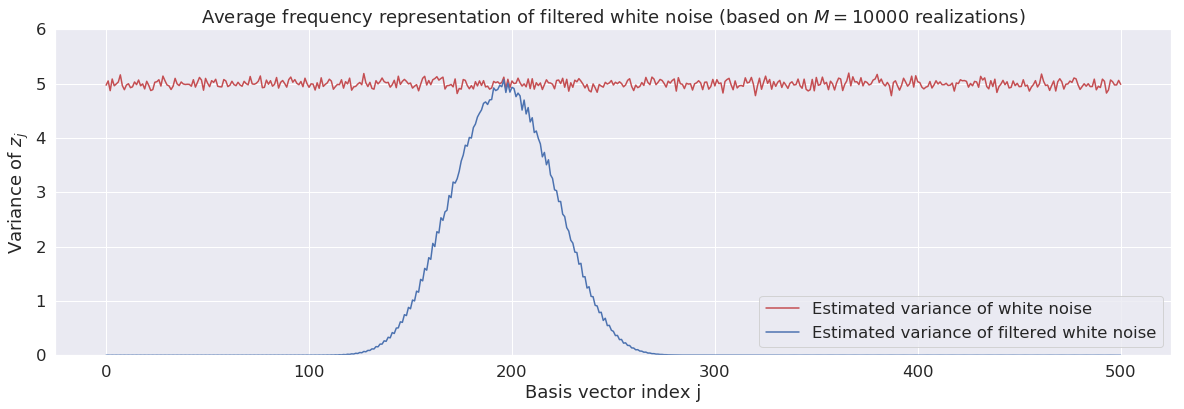

In [75]:
from scipy.signal import convolve

def apply_filter(y, h):
    return convolve(y, h, 'same')

E_filtered = np.zeros(E.shape)
for m in range(M):
    # your solution goes here
    E_filtered[:, m] = apply_filter(E[:, m], h)
    
# compute coordinates of the filtered signals in new basis
Z_filtered = V.T@E_filtered #

plt.figure(figsize=(20, 6))
plt.plot(np.var(Z, 1), 'r', label='Estimated variance of white noise')
plt.plot(np.var(Z_filtered, 1), 'b', label='Estimated variance of filtered white noise')
plt.xlabel('Basis vector index j')
plt.ylabel('Variance of $z_j$')
plt.title('Average frequency representation of filtered white noise (based on $M = %d$ realizations)' % M)
plt.legend()
plt.ylim(0, 6);


Recall that the first basis vector is a constant, whereas the remaining basis vectors comes in pairs of cosine and sine-functions. We can compute the analysis frequency corresponding to the $k$'th pair of cosine and sine functions as:

$$f_{\text{analysis}}(k) = k\frac{f_s}{N}$$

The basis vector with index $j = 201$ corresponds to $k = 100$ and has the following analysis frequency

$$f_{\text{analysis}}(k) = k\frac{f_s}{N} = 100\frac{51Hz}{501} \approx 10.2Hz $$

***Question 8*** Based on the plot above, what can you say about the filter $h$? What type of filter is it? 

***Optional question***: Compute and plot the frequency response of the filter by first zero-padding the filter to have length $N$ and then computing the amplitude spectrum of the zero-padded filter

Text(0.5, 1.0, 'Frequency response of filter h')

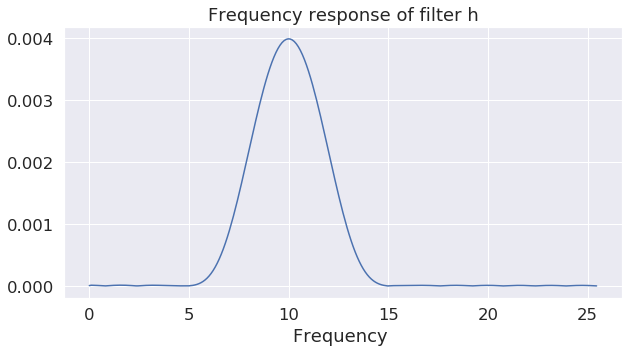

In [80]:
htilde = np.zeros(N)
htilde[:len(h)] = h

plt.figure(figsize=(10, 5))
plt.plot(freqs, compute_spectrum(htilde, V))
plt.xlabel('Frequency ')
plt.title('Frequency response of filter h')

### Part 2: Detecting alpha waves

First we will load the simulated data we are going to work with

In [177]:
data = np.load('./eeg_sim.npz')
Y = data['Y']
labels = data['labels']

print(Y.shape)
print(labels.shape)

(10000, 501)
(10000,)


### Let's split into a training and a test set

In [178]:
M_train = 1000

Y_train = Y[:M_train, :]
Y_test = Y[M_train:, :]
labels_train = labels[:M_train]
labels_test = labels[M_train:]



The variable $Y$ contains $M = 10000$ time-series of length $N = 501$. Roughly half of these time-series contains alpha-waves. The array $\text{labels}$ contains zeros and ones, where a "1" indicates that the corresponding time-series contains alpha-waves and "0" indicates that theres no alpha-waves present. The purpose of the rest of the assignment is to construct a detector for alpha-waves.

First, let's visualize the data

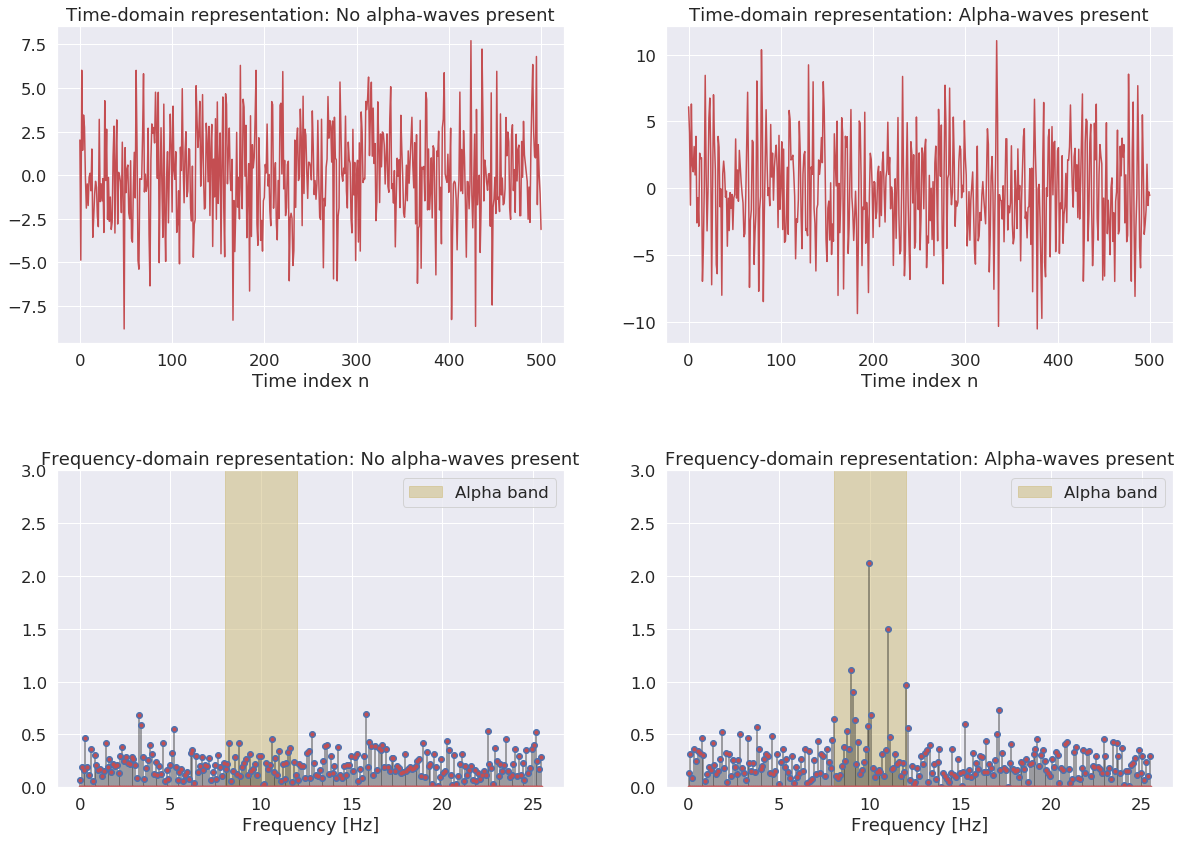

In [179]:
no_alpha_idx = np.where(labels_train==0)[0][0]
alpha_idx = np.where(labels_train==1)[0][0]

C0 = compute_spectrum(Y_train[no_alpha_idx], V)
C1 = compute_spectrum(Y_train[alpha_idx], V)

fig = plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.plot(Y_train[no_alpha_idx], 'r')
plt.title('Time-domain representation: No alpha-waves present')
plt.xlabel('Time index n')

plt.subplot(2, 2, 2)
plt.plot(Y_train[alpha_idx], 'r')
plt.title('Time-domain representation: Alpha-waves present')
plt.xlabel('Time index n')

plt.subplot(2, 2, 3)
plt.stem(freqs, C0, 'r.')
plt.vlines(freqs, C0, 0, alpha=0.5)
plt.ylim(0, 3)
plt.title('Frequency-domain representation: No alpha-waves present')
plt.fill_between(np.linspace(8, 12, 10), 3*np.ones(10), color='y', alpha=0.5, label='Alpha band')
plt.xlabel('Frequency [Hz]')
plt.legend()


plt.subplot(2, 2, 4)
plt.stem(freqs, C1, 'r.')
plt.vlines(freqs, C1, 0, alpha=0.5)
plt.title('Frequency-domain representation: Alpha-waves present')
plt.ylim(0, 3)
plt.fill_between(np.linspace(8, 12, 10), 3*np.ones(10), color='y', alpha=0.5, label='Alpha band')
plt.xlabel('Frequency [Hz]')
plt.legend()

fig.subplots_adjust(hspace=0.4)



The top row shows the time-domain representation for two of the time-series and the bottom row shows the corresponding amplitude spectres. The signal visualized in the right column contains alpha waves, whereas the signal in the left column does not. 

As suggested by the figure suggests, we can use the energy in the alpha frequency band, i.e. the energy distributed across the frequency interval 8-12Hz, to detect the alpha waves.

### Calculating the energy in the alpha band

We will use the total energy in the alpha frequency band (shown in yellow above) as a feature for detecting the alpha waves.

***Question 9***: Complete the implementation of the function compute_alpha_energy below:


In [180]:
def compute_alpha_energy(y, h):
    # the function take an N-dimensional signal y and
    # 1. applies the filter h 
    # 2. computes and returns the energy of the resulting signal
    
    # your implementation goes here
    yfil = apply_filter(y, h) # 
    energy = compute_energy(yfil)
    return energy

    


In [181]:
# compute energy in alpha band for all time-series
alpha_energies = np.zeros(M_train)
for m in range(M_train):
    alpha_energies[m] = compute_alpha_energy(Y[m], h)




### Visualizing the energies in the alpha-band

Text(0.5, 0, 'Energy in alpha band')

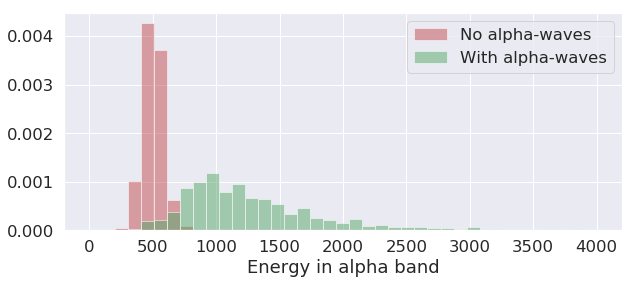

In [193]:
bins = np.linspace(0, 4000, 40)
plt.figure(figsize=(10, 4))
plt.hist(alpha_energies[labels_train==0], bins,  color='r', density=True, label='No alpha-waves', alpha=0.5 )
plt.hist(alpha_energies[labels_train==1], bins, color='g', density=True,  label='With alpha-waves', alpha=0.5);
plt.legend()
plt.xlabel('Energy in alpha band')

### Log energies

Text(0.5, 0, 'Log energy in alpha band')

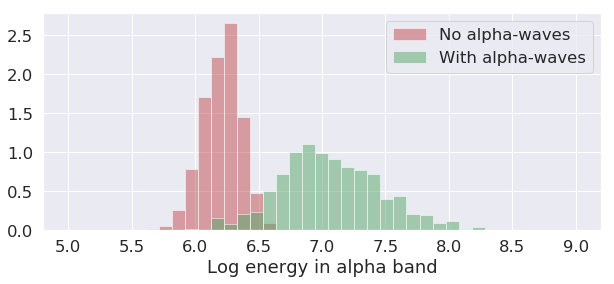

In [194]:
log_bins = np.linspace(5, 9, 40)
plt.figure(figsize=(10, 4))
plt.hist(np.log(alpha_energies[labels_train==0]), log_bins, color='r',density=True, label='No alpha-waves', alpha=0.5)
plt.hist(np.log(alpha_energies[labels_train==1]), log_bins, color='g', density=True, label='With alpha-waves', alpha=0.5);
plt.legend()
plt.xlabel('Log energy in alpha band')

### Fitting Bayesian classifier (from week XX?)

***Question 10*** Fit a normal distribution to the two subpopulations of the log alpha energies

In [187]:
# solution
m0, v0 = np.mean(np.log(alpha_energies[labels_train==0])), np.var(np.log(alpha_energies[labels_train==0]))
m1, v1 = np.mean(np.log(alpha_energies[labels_train==1])), np.var(np.log(alpha_energies[labels_train==1]))

npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)

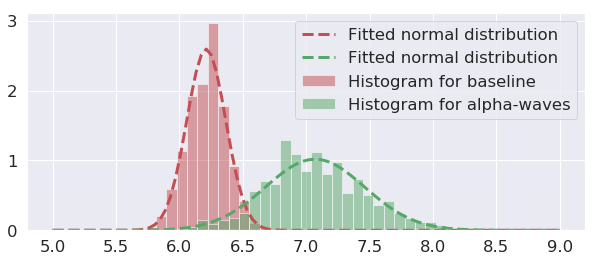

In [188]:
xs = np.linspace(log_bins[0], log_bins[-1], 100)

plt.figure(figsize=(10, 4))
plt.hist(np.log(alpha_energies[labels_train==0]), log_bins, color='r', density=True, label='Histogram for baseline', alpha=0.5)
plt.hist(np.log(alpha_energies[labels_train==1]), log_bins, color='g', density=True,  label='Histogram for alpha-waves', alpha=0.5);
plt.plot(xs, npdf(xs, m0, v0), 'r--', linewidth=3, label='Fitted normal distribution')
plt.plot(xs, npdf(xs, m1, v1), 'g--', linewidth=3, label='Fitted normal distribution')
plt.legend()

### Use the Bayesian classifier from week 3 to detect alpha waves based on log energy lelves

Text(0.5, 1.0, 'Posterior probability of alpha waves present')

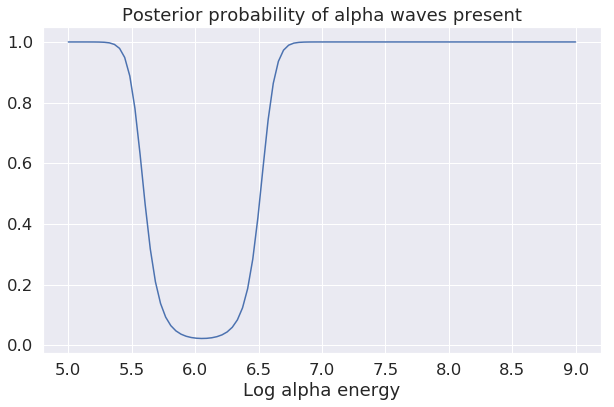

In [189]:
log_npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)

def compute_posterior(log_alpha_energy):
    t0 = log_npdf(log_alpha_energy, m0, v0)
    t1 = log_npdf(log_alpha_energy, m1, v1)
    r = t1 - t0
    
    return 0.5*t1/(0.5*t0 + 0.5*t1)


def classify(y):
    alpha_energy = compute_alpha_energy(y, h)
    log_alpha_energy = np.log(alpha_energy)
    
    post = compute_posterior(log_alpha_energy)
    return 1.0*(post > 0.5)



plt.figure(figsize=(10, 6))
plt.plot(xs, compute_posterior(xs))
plt.xlabel('Log alpha energy')
plt.title('Posterior probability of alpha waves present')

### Evaluate on training and test sets

***Question XX***: Compute the training and test accuracy of the classifyer

In [190]:
labels_train_pred = np.array([classify(y) for y in Y_train])
labels_test_pred = np.array([classify(y) for y in Y_test])

train_acc = np.mean(labels_train == labels_train_pred)
test_acc = np.mean(labels_test == labels_test_pred)

print('Training accuracy:\t%4.3f' % train_acc)
print('Test accuracy:\t\t%4.3f' % test_acc)

Training accuracy:	0.960
Test accuracy:		0.950


### Data set generators

In [28]:
from scipy.signal import firwin
from scipy.signal import convolve
#h = firwin(32, [2*8/fs, 2*12/fs], pass_zero='bandpass')
h = firwin(32, [2*3/fs, 2*5/fs], pass_zero='bandpass')


print('h = np.array([', end='')
for hi in h:
    print('%5.4f, ' % hi, end='')
print('])')

h = np.array([0.0011, 0.0042, 0.0086, 0.0137, 0.0167, 0.0129, -0.0012, -0.0255, -0.0543, -0.0769, -0.0819, -0.0617, -0.0173, 0.0404, 0.0944, 0.1268, 0.1268, 0.0944, 0.0404, -0.0173, -0.0617, -0.0819, -0.0769, -0.0543, -0.0255, -0.0012, 0.0129, 0.0167, 0.0137, 0.0086, 0.0042, 0.0011, ])


In [176]:

def simulate_signal(alpha, fs, N, f_list, sigma2_alpha, sigma2_noise):
    ns = np.arange(N)
    

    f = np.zeros(N)
    a_list = np.random.normal(0, np.sqrt(sigma2_alpha), size=len(f_list))
    
    if alpha:
        
        
        for ai, fi in zip(a_list, f_list):
            f += ai*np.cos(2*np.pi*fi*ns/fs)
    
    noise = np.random.normal(0, np.sqrt(sigma2_noise), size=N)
    y = f + noise
    
    return y, f, noise, ns, a_list

np.random.seed(0)    

N = 501
fs = 51

sigma2_alpha = 1.
sigma2_noise = 8.
f_list = [8, 9, 10, 11, 12]

M = 10000
p = 0.5

Y = []
labels = []


np.random.seed(0)
for m in range(M):
    
    alpha = np.random.binomial(1, p)
    
    y, f, noise, ns, a_list = simulate_signal(alpha=alpha==1, fs=fs, N=N, f_list=f_list, sigma2_alpha=sigma2_alpha, sigma2_noise=sigma2_noise)
    
    Y.append(y)
    labels.append(alpha)
    


    
Y = np.stack(Y)
labels = np.array(labels)

np.savez('eeg_sim.npz', **{'Y': Y, 'labels': labels})

    
    
